## Ex4-001
1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS.  
2. Считать данные с помощью pandas.  
3. Вывести на экран первые 5 строк.

In [1]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [111]:
import numpy as np

In [4]:
file_data = 'laptops_10.csv'

In [5]:
df = pd.read_csv(file_data, encoding='ISO-8859-1')

In [7]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Cpu            1303 non-null   object 
 5   Ram            1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float64
 9   Price_euros    1303 non-null   float64
 10  Cpu_Company    1303 non-null   object 
 11  Memory_Amount  1303 non-null   int64  
 12  Memory_Type    1303 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


### Ex4-001-1
Изучите количество памяти с помощью matplotlib.

In [11]:
data_m_types = df['Memory_Type'].value_counts()

In [12]:
names = data_m_types.index

In [13]:
values = data_m_types.values

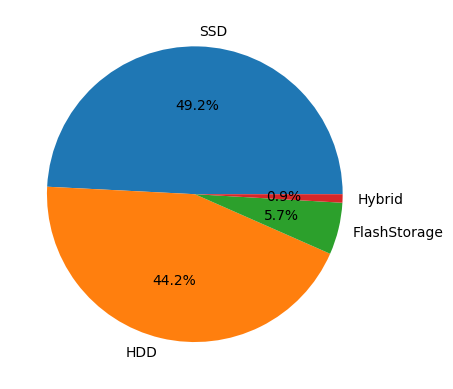

In [20]:
plt.pie(values, labels=names, autopct='%.1f%%');

### Ex4-001-2
Изучите стоимость ноутбуков с помощью matplotlib.

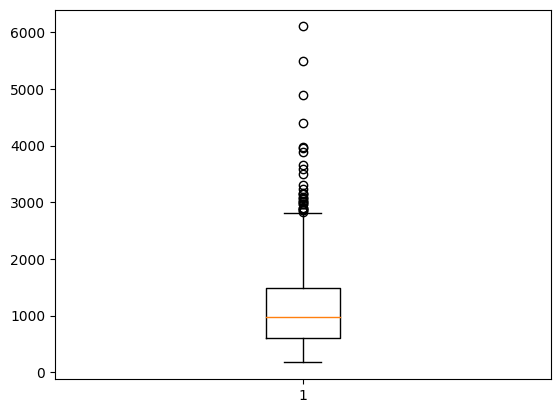

In [26]:
plt.boxplot(df['Price_euros']);

### Ex4-001-3
Изучите вес ноутбуков с помощью matplotlib:  
- постройте график;  
- назовите график;  
- сделайте именование оси x и оси y;  
- сделайте выводы;

In [32]:
data_weights = df['Weight'].value_counts()

In [33]:
names = data_weights.index

In [35]:
values = data_weights.values

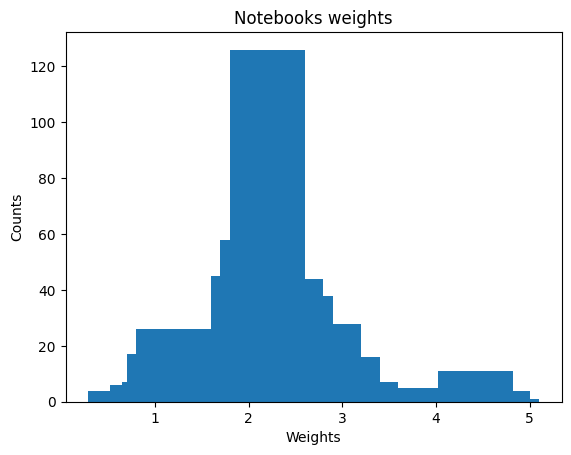

In [38]:
plt.bar(x=names, height=values)
plt.xlabel('Weights')
plt.ylabel('Counts')
plt.title('Notebooks weights');

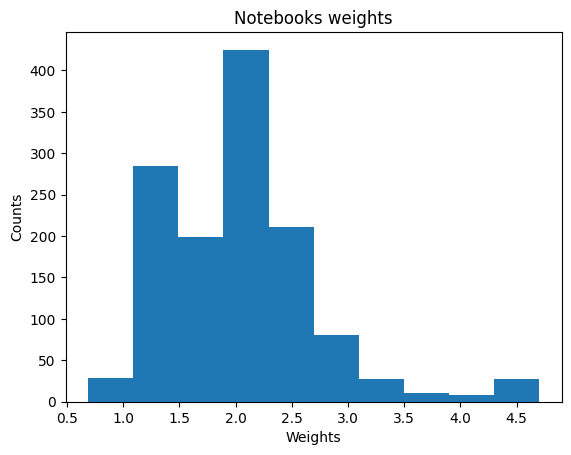

In [40]:
plt.hist(df['Weight'])
plt.xlabel('Weights')
plt.ylabel('Counts')
plt.title('Notebooks weights');

## Ex4-002

### Ex4-002-1
Изучите распределение типов носителя.

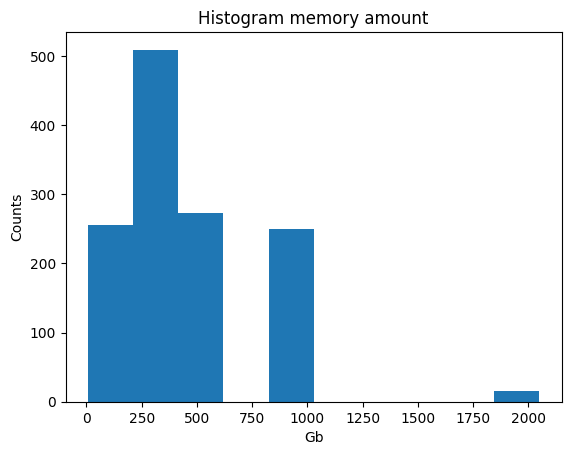

In [58]:
plt.hist(df['Memory_Amount']);
plt.xlabel('Gb')
plt.ylabel('Counts')
plt.title('Histogram memory amount');

### Ex4-002-2
Изучите распределение компаний производителей.

In [62]:
data_companies = df['Company'].value_counts()

In [63]:
names = data_companies.index

In [64]:
values = data_companies.values

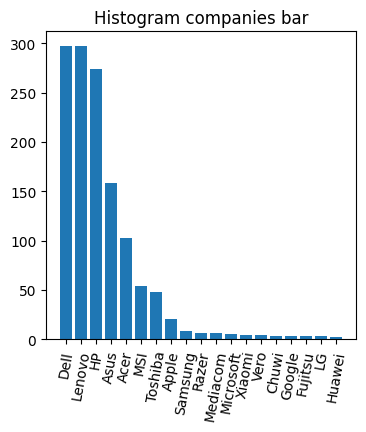

In [73]:
plt.figure(figsize=(4, 4))
plt.bar(x=names, height=values);
plt.xticks(rotation=80)
plt.title('Histogram companies bar');

### Ex4-002-3
Изучите распределение операционной системы.

In [75]:
data_osys = df['OpSys'].value_counts()

In [76]:
names = data_osys.index

In [77]:
values = data_osys.values

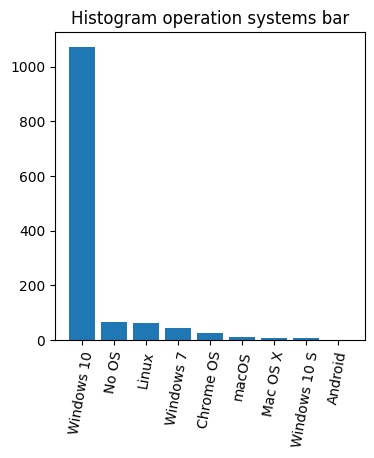

In [78]:
plt.figure(figsize=(4, 4))
plt.bar(x=names, height=values);
plt.xticks(rotation=80)
plt.title('Histogram operation systems bar');

### Ex4-002-4
Изучите распределение компаний производителей CPU:
- постройте график;
- сделайте выводы;

In [82]:
data_cpupr_types = df['Cpu_Company'].value_counts()

In [83]:
names = data_cpupr_types.index

In [84]:
values = data_cpupr_types.values

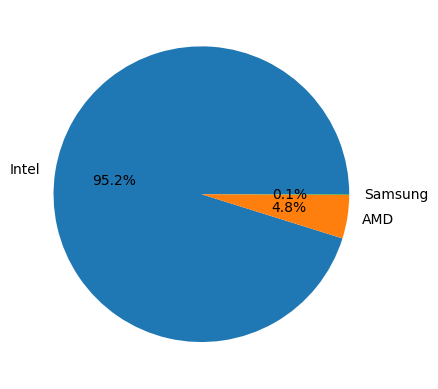

In [85]:
plt.pie(values, labels=names, autopct='%.1f%%');

## Ex4-003
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму.
Процессоры от Samsung не изучайте.

### Ex4-003-1
Постройте график в абсолютных величинах.

In [108]:
data_table = pd.crosstab(df['Company'], df['Cpu_Company'])

In [109]:
data_table = data_table.drop(columns = ['Samsung']).reset_index()

In [ ]:
names = data_cpupr_types.index

In [ ]:
values = data_cpupr_types.values

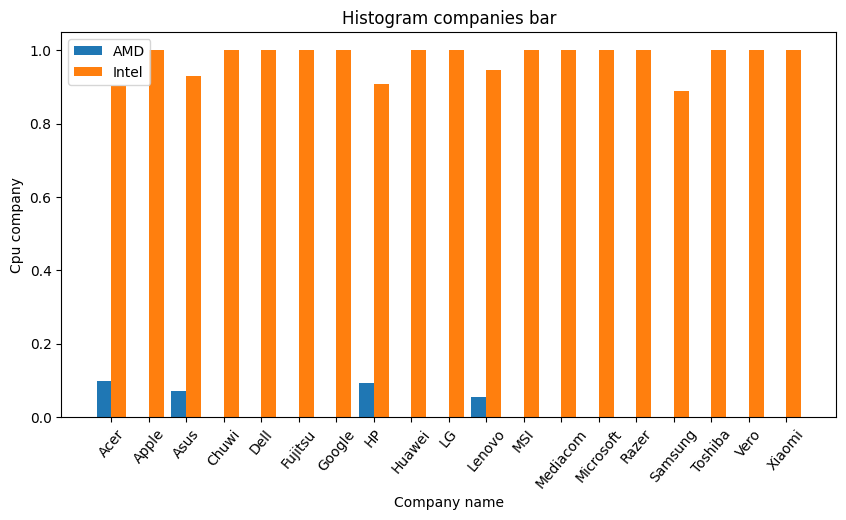

In [128]:
plt.figure(figsize=(10, 5))
n_ticks = np.arange(len(data_table['Company']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data_table['AMD'], width=w)
plt.bar(n_ticks + offset, data_table['Intel'], width=w)
plt.xlabel('Company name')
plt.ylabel('Cpu company')
plt.xticks(n_ticks, data_table['Company'], rotation=50)
plt.title('Histogram companies bar');
plt.legend(['AMD', 'Intel']);

### Ex4-003-2
Постройте график в относительных величинах.

In [123]:
data_table = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')

In [124]:
data_table = data_table.drop(columns = ['Samsung']).reset_index()

In [ ]:
names = data_cpupr_types.index

In [ ]:
values = data_cpupr_types.values

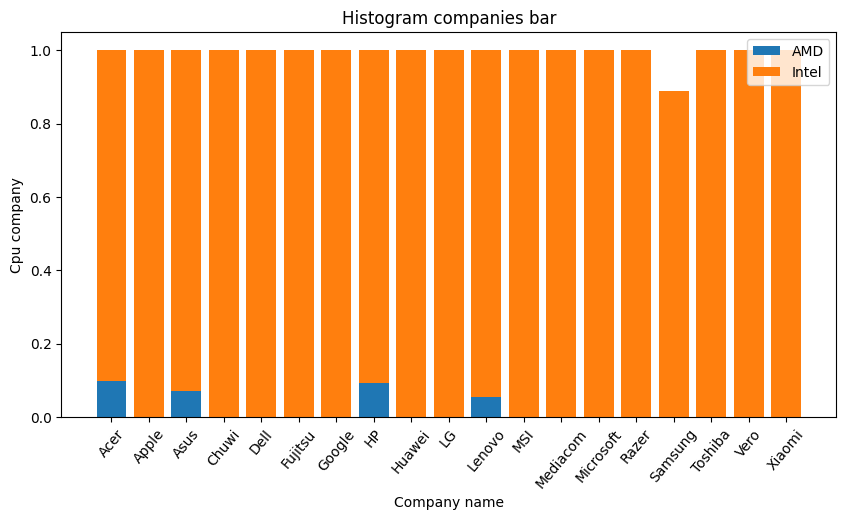

In [126]:
plt.figure(figsize=(10, 5))

plt.bar(data_table['Company'], data_table['AMD'])
plt.bar(data_table['Company'], data_table['Intel'], bottom=data_table['AMD'])

plt.xlabel('Company name')
plt.ylabel('Cpu company')
plt.xticks(rotation=50)
plt.title('Histogram companies bar');
plt.legend(['AMD', 'Intel']);

## Ex4-004

### Ex4-004-1
Изучите взаимосвязь стоимости ноутбука и компании производителя процессора.

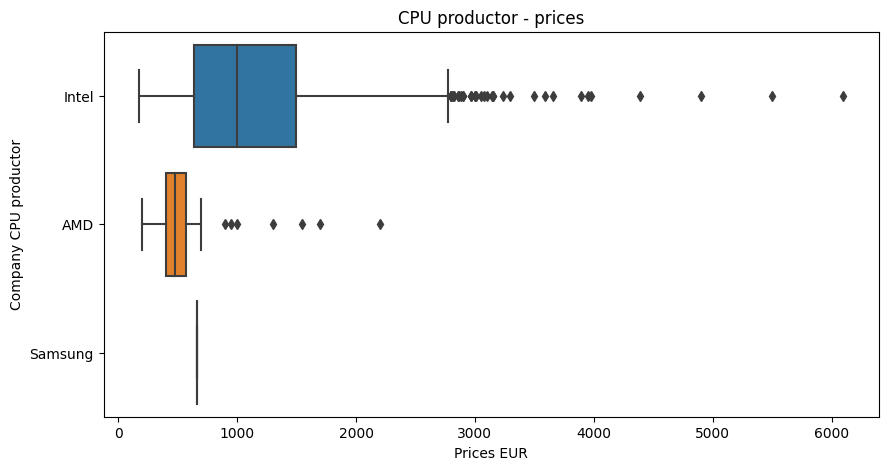

In [129]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5)

plt.xlabel('Prices EUR')
plt.ylabel('Company CPU productor')
plt.title('CPU productor - prices');

### Ex4-004-2
Изучите взаимосвязь стоимости ноутбука и типа носителя памяти.

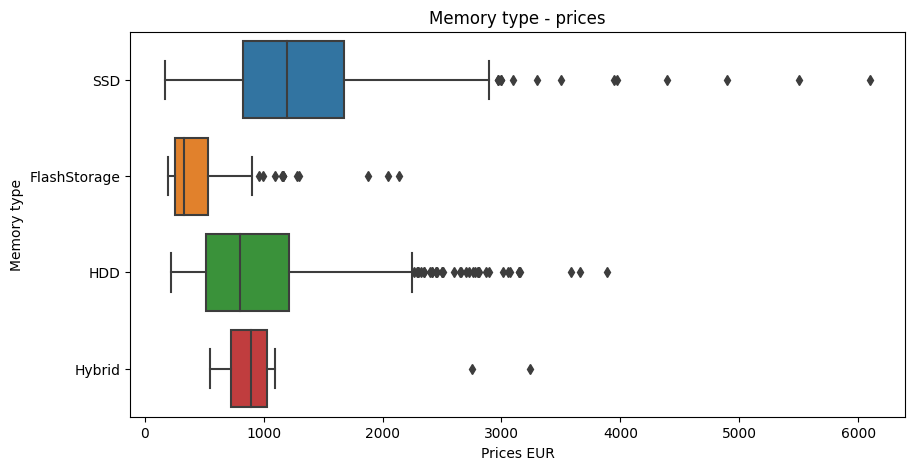

In [131]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)

plt.xlabel('Prices EUR')
plt.ylabel('Memory type')
plt.title('Memory type - prices');

### Ex4-004-3
Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти.

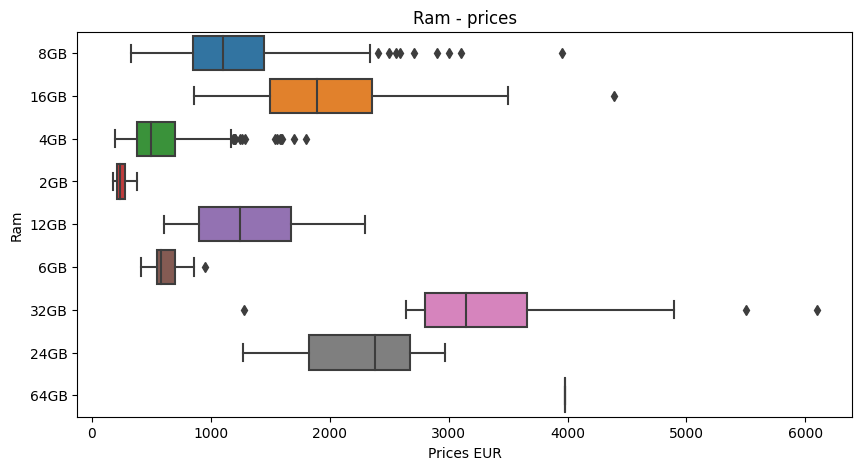

In [133]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5)

plt.xlabel('Prices EUR')
plt.ylabel('Ram')
plt.title('Ram - prices');

### Ex4-004-4
Изучите взаимосвязь стоимости ноутбука и компании производителя:
- постройте график;
- назовите график;
- сделайте именование оси x и оси y;
- сделайте выводы;

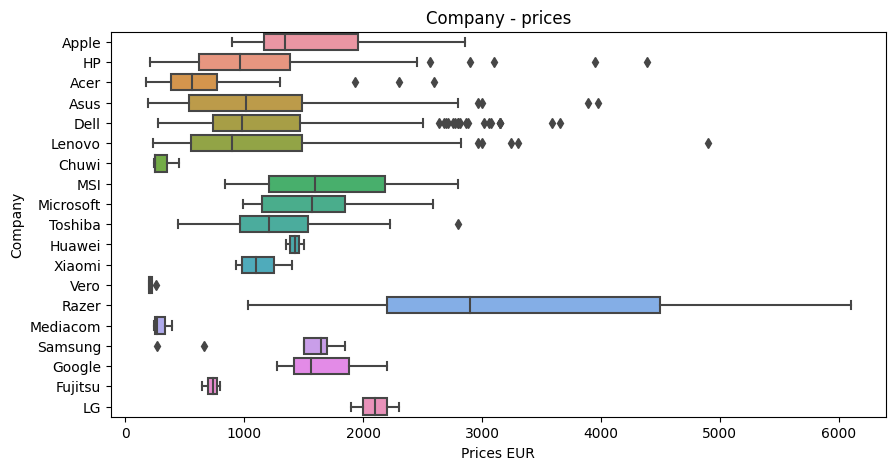

In [134]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)

plt.xlabel('Prices EUR')
plt.ylabel('Company')
plt.title('Company - prices');

## Ex4-005
Постройте матрицу корреляций для таблицы.

In [144]:
corr_matrix = df.corr(numeric_only = True)

In [145]:
corr_matrix = np.round(corr_matrix, 1)

In [146]:
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

In [147]:
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


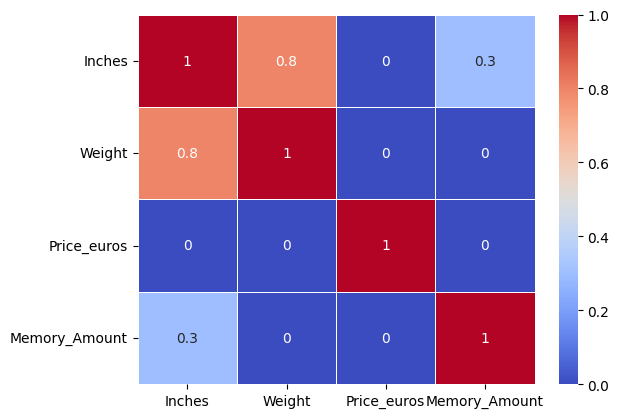

In [150]:
sns.heatmap(corr_matrix, annot=True, linewidths = 0.5, cmap='coolwarm');